# <a> Data Science in Projects - Project 1: Price Prediction</a>

## Let's Data - Data Science Journey

*By Reginaldo Jr - <a>reginaldojr@yahoo.com</a>*

## Imports and Configurations

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import warnings
import pickle   as pk

from IPython.display import clear_output
from plotly import express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFdr, SelectFpr, SelectFwe, f_regression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor, HuberRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRFRegressor
from statsmodels import api as sm

from sklearn.metrics import r2_score,mean_squared_error

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

## Data

In [2]:
df = pd.read_csv('cardekho_imputated.csv', index_col=0)
df.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,711000.00,748000.00,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,854082.87,1307925.56,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,357003.86,465401.54,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1014000.00,1379000.00,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
df.shape

(15411, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.9+ MB


## EDA

In [5]:
df.describe()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
25%,668000.00,872866.67,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
75%,1284000.00,1743000.00,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,988000000.00,91100000.00,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [6]:
df.describe([i/10 for i in range(1,10)])

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00,15411.00
mean,5892971.12,1962623.92,6.04,55616.48,19.70,1486.06,100.59,5.33,774971.12
std,56698513.93,2889635.64,3.01,51618.55,4.17,521.11,42.97,0.81,894128.36
min,311000.00,436000.00,0.00,100.00,4.00,793.00,38.40,0.00,40000.00
10%,517000.00,657000.00,3.00,15000.00,13.96,998.00,67.00,5.00,268000.00
20%,629140.52,729333.33,3.00,25000.00,16.10,1197.00,72.00,5.00,350000.00
30%,676000.00,920202.61,4.00,34500.00,17.43,1197.00,78.90,5.00,420000.00
40%,706216.37,1042000.00,5.00,41000.00,18.60,1199.00,82.00,5.00,490000.00
50%,855000.00,1206000.00,6.00,50000.00,19.67,1248.00,88.50,5.00,556000.00
60%,968000.00,1340179.86,6.00,58719.00,20.54,1493.00,97.90,5.00,650000.00


In [7]:
[col for col in df.columns if df[col].dtype!="O"]

['min_cost_price',
 'max_cost_price',
 'vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [8]:
numeric_cols = ['min_cost_price',
 'max_cost_price',
 'vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'selling_price']

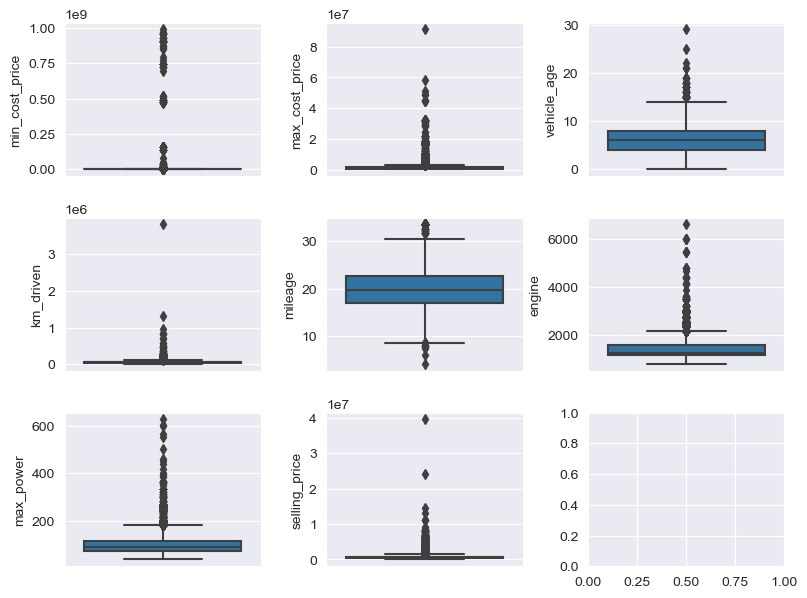

In [9]:
fig, graf = plt.subplots(3,3, figsize=(8,6))

plt.tight_layout()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=graf[i//3][i%3])

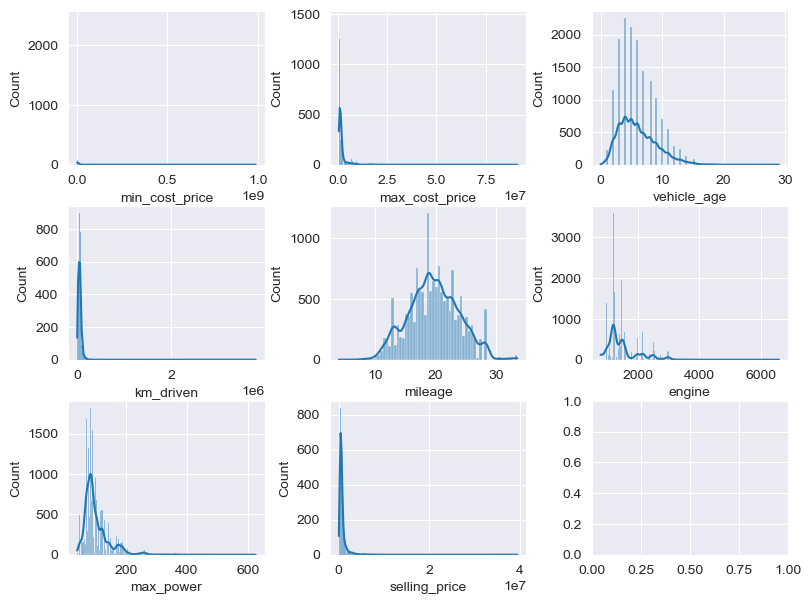

In [10]:
fig, graf = plt.subplots(3,3, figsize=(8,6))

plt.tight_layout()
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=graf[i//3][i%3], kde=True)

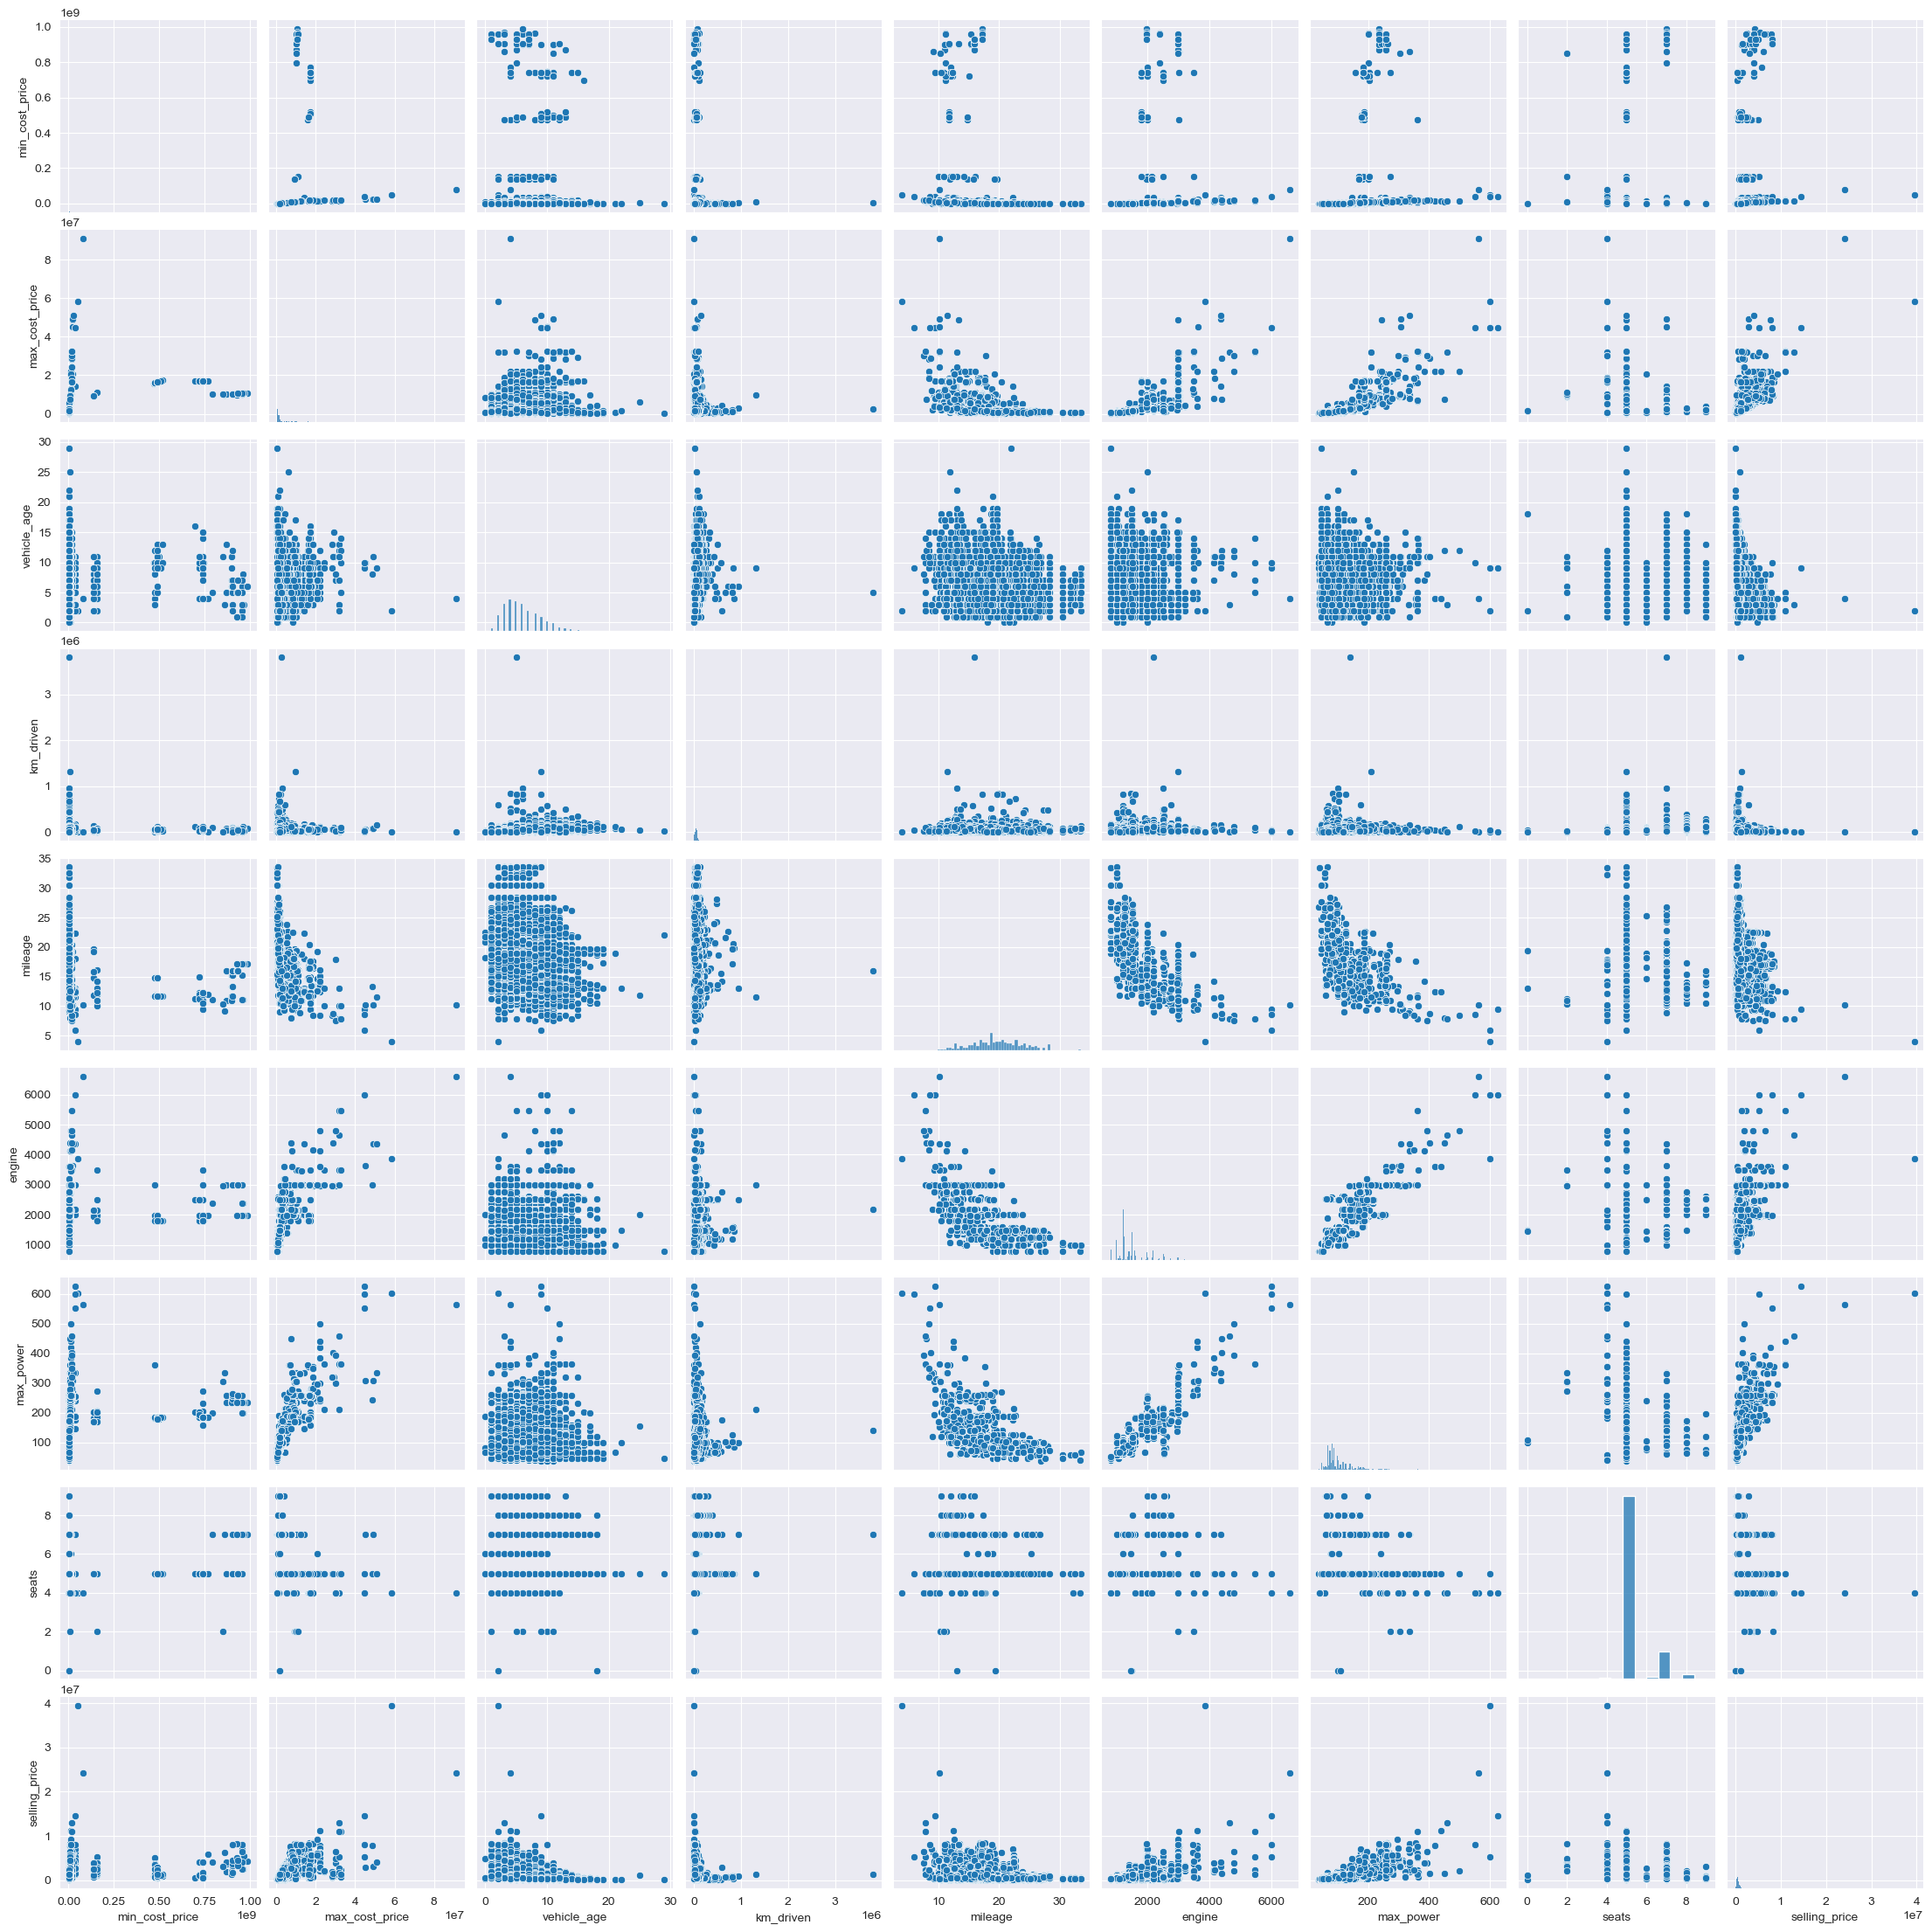

In [11]:
sns.pairplot(df)

<Axes: >

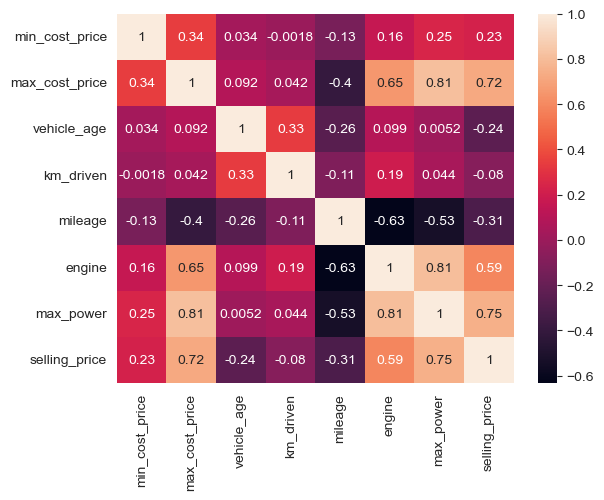

In [12]:
sns.heatmap(data=df[numeric_cols].corr(), annot=True)

## Base separation

In [51]:
X = df.drop(["selling_price",'car_name', 'model'],axis=1)
y = df[["selling_price"]]

## Separation of Variables and Base separation

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12328, 12), (3083, 12), (12328, 1), (3083, 1))

## Outliers Treatment

In [53]:
iiq  = y_train['selling_price'].describe()["75%"] - y_train['selling_price'].describe()["25%"]
outlier_up = y_train['selling_price'].describe()["75%"] + 1.5 *iiq
outlier_down = y_train['selling_price'].describe()["25%"] - 1.5 *iiq
outlier_index = y_train.loc[(y_train["selling_price"]>=outlier_up) | (y_train["selling_price"]<=outlier_down)].index
len(outlier_index)

1103

In [54]:
X_train = X_train.loc[~X_train.index.isin(outlier_index)]
y_train = y_train.loc[~y_train.index.isin(outlier_index)]

In [55]:
iiq  = y_test['selling_price'].describe()["75%"] - y_test['selling_price'].describe()["25%"]
outlier_up = y_test['selling_price'].describe()["75%"] + 1.5 *iiq
outlier_down = y_test['selling_price'].describe()["25%"] - 1.5 *iiq
outlier_index = y_test.loc[(y_test["selling_price"]>=outlier_up) | (y_test["selling_price"]<=outlier_down)].index
len(outlier_index)

286

In [56]:
X_test = X_test.loc[~X_test.index.isin(outlier_index)]
y_test = y_test.loc[~y_test.index.isin(outlier_index)]

## Coding of Categorical Variables

In [57]:
categorical_cols = [col for col in X_train.columns if df[col].dtype=="O"]
categorical_cols

['brand', 'seller_type', 'fuel_type', 'transmission_type']

In [58]:
categories = []
for col in categorical_cols:
    categories.append(list(df[col].unique()))
categories

[['Maruti',
  'Hyundai',
  'Ford',
  'Renault',
  'Mini',
  'Mercedes-Benz',
  'Toyota',
  'Volkswagen',
  'Honda',
  'Mahindra',
  'Datsun',
  'Tata',
  'Kia',
  'BMW',
  'Audi',
  'Land Rover',
  'Jaguar',
  'MG',
  'Isuzu',
  'Porsche',
  'Skoda',
  'Volvo',
  'Lexus',
  'Jeep',
  'Maserati',
  'Bentley',
  'Nissan',
  'ISUZU',
  'Ferrari',
  'Mercedes-AMG',
  'Rolls-Royce',
  'Force'],
 ['Individual', 'Dealer', 'Trustmark Dealer'],
 ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
 ['Manual', 'Automatic']]

In [59]:
ohe = OneHotEncoder(sparse=False, categories=categories, drop='first')
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])
display(ohe.categories_)
display(ohe.get_feature_names_out())    

[array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
        'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
        'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
        'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
        'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
        'Rolls-Royce', 'Force'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object)]

array(['brand_Hyundai', 'brand_Ford', 'brand_Renault', 'brand_Mini',
       'brand_Mercedes-Benz', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Honda', 'brand_Mahindra', 'brand_Datsun', 'brand_Tata',
       'brand_Kia', 'brand_BMW', 'brand_Audi', 'brand_Land Rover',
       'brand_Jaguar', 'brand_MG', 'brand_Isuzu', 'brand_Porsche',
       'brand_Skoda', 'brand_Volvo', 'brand_Lexus', 'brand_Jeep',
       'brand_Maserati', 'brand_Bentley', 'brand_Nissan', 'brand_ISUZU',
       'brand_Ferrari', 'brand_Mercedes-AMG', 'brand_Rolls-Royce',
       'brand_Force', 'seller_type_Dealer',
       'seller_type_Trustmark Dealer', 'fuel_type_Diesel',
       'fuel_type_CNG', 'fuel_type_LPG', 'fuel_type_Electric',
       'transmission_type_Automatic'], dtype=object)

In [60]:
X_train_ohe = pd.DataFrame(data=X_train_ohe, columns=ohe.get_feature_names_out(), index=X_train.index)
X_train_ohe.head()

,brand_Hyundai,brand_Ford,brand_Renault,brand_Mini,brand_Mercedes-Benz,brand_Toyota,brand_Volkswagen,brand_Honda,brand_Mahindra,brand_Datsun,brand_Tata,brand_Kia,brand_BMW,brand_Audi,brand_Land Rover,brand_Jaguar,brand_MG,brand_Isuzu,brand_Porsche,brand_Skoda,brand_Volvo,brand_Lexus,brand_Jeep,brand_Maserati,brand_Bentley,brand_Nissan,brand_ISUZU,brand_Ferrari,brand_Mercedes-AMG,brand_Rolls-Royce,brand_Force,seller_type_Dealer,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_CNG,fuel_type_LPG,fuel_type_Electric,transmission_type_Automatic
1731,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
403,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
13550,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
9032,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
11023,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [61]:
X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test_ohe.head()

,brand_Hyundai,brand_Ford,brand_Renault,brand_Mini,brand_Mercedes-Benz,brand_Toyota,brand_Volkswagen,brand_Honda,brand_Mahindra,brand_Datsun,brand_Tata,brand_Kia,brand_BMW,brand_Audi,brand_Land Rover,brand_Jaguar,brand_MG,brand_Isuzu,brand_Porsche,brand_Skoda,brand_Volvo,brand_Lexus,brand_Jeep,brand_Maserati,brand_Bentley,brand_Nissan,brand_ISUZU,brand_Ferrari,brand_Mercedes-AMG,brand_Rolls-Royce,brand_Force,seller_type_Dealer,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_CNG,fuel_type_LPG,fuel_type_Electric,transmission_type_Automatic
4259,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
13896,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3212,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
12058,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17316,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [62]:
X_train = X_train.drop(categorical_cols, axis=1)
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_train.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,brand_Hyundai,brand_Ford,brand_Renault,brand_Mini,brand_Mercedes-Benz,brand_Toyota,brand_Volkswagen,brand_Honda,brand_Mahindra,brand_Datsun,brand_Tata,brand_Kia,brand_BMW,brand_Audi,brand_Land Rover,brand_Jaguar,brand_MG,brand_Isuzu,brand_Porsche,brand_Skoda,brand_Volvo,brand_Lexus,brand_Jeep,brand_Maserati,brand_Bentley,brand_Nissan,brand_ISUZU,brand_Ferrari,brand_Mercedes-AMG,brand_Rolls-Royce,brand_Force,seller_type_Dealer,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_CNG,fuel_type_LPG,fuel_type_Electric,transmission_type_Automatic
1731,553000.00,782000.00,2,10000,23.84,1199,84.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
403,1268000.00,1680000.00,7,63000,17.80,1497,117.30,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
13550,698320.00,729333.33,10,80292,20.36,1197,78.90,5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
9032,684580.91,1054132.78,4,80000,27.39,1248,74.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
11023,3566000.00,3898000.00,6,39000,13.14,1798,160.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [63]:
X_test = X_test.drop(categorical_cols, axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)
X_test.head()

,min_cost_price,max_cost_price,vehicle_age,km_driven,mileage,engine,max_power,seats,brand_Hyundai,brand_Ford,brand_Renault,brand_Mini,brand_Mercedes-Benz,brand_Toyota,brand_Volkswagen,brand_Honda,brand_Mahindra,brand_Datsun,brand_Tata,brand_Kia,brand_BMW,brand_Audi,brand_Land Rover,brand_Jaguar,brand_MG,brand_Isuzu,brand_Porsche,brand_Skoda,brand_Volvo,brand_Lexus,brand_Jeep,brand_Maserati,brand_Bentley,brand_Nissan,brand_ISUZU,brand_Ferrari,brand_Mercedes-AMG,brand_Rolls-Royce,brand_Force,seller_type_Dealer,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_CNG,fuel_type_LPG,fuel_type_Electric,transmission_type_Automatic
4259,698320.00,729333.33,12,73000,20.36,1197,78.90,5,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
13896,684580.91,1054132.78,4,58000,27.39,1248,74.00,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3212,926776.00,1149968.00,7,96000,20.77,1248,88.76,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
12058,357003.86,465401.54,11,62000,19.70,796,46.30,5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
17316,1485000.00,2141000.00,10,35000,13.93,2179,138.00,7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


### PCA

In [64]:
for i in range(1,len(X_train.columns)+1):
    pca = PCA(n_components = i, random_state=42).fit(X_train)
    print(f'{i} component(s) explained variance ratio {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')

1 component(s) explained variance ratio 0.9982831385885614: [0.99828314]
2 component(s) explained variance ratio 0.9999982646554041: [0.99828314 0.00171513]
3 component(s) explained variance ratio 0.9999999999020669: [9.98283139e-01 1.71512607e-03 1.73524666e-06]
4 component(s) explained variance ratio 0.9999999999997546: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11]
5 component(s) explained variance ratio 0.9999999999999811: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13]
6 component(s) explained variance ratio 0.9999999999999933: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13 1.17394263e-14]
7 component(s) explained variance ratio 0.9999999999999986: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13 1.17394263e-14 5.55184846e-15]
8 component(s) explained variance ratio 0.9999999999999987: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13 1.17394263e-14 5.5

31 component(s) explained variance ratio 0.999999999999998: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13 1.17394263e-14 5.55184846e-15 2.74179188e-16
 2.23016393e-16 1.60908347e-16 1.02412311e-16 9.75214369e-17
 6.76447127e-17 4.66270596e-17 4.45682237e-17 3.62648542e-17
 2.97635452e-17 2.37505694e-17 1.76652911e-17 1.59276982e-17
 1.16946499e-17 1.11477686e-17 8.55263830e-18 7.46314711e-18
 5.06446623e-18 2.85652502e-18 2.38970670e-18 9.32043154e-19
 7.56419689e-19 5.88958286e-19 4.96754415e-19]
32 component(s) explained variance ratio 0.999999999999998: [9.98283139e-01 1.71512607e-03 1.73524666e-06 9.76877825e-11
 2.25500000e-13 1.17394263e-14 5.55184846e-15 2.74179188e-16
 2.23016393e-16 1.60908347e-16 1.02412311e-16 9.75214369e-17
 6.76447127e-17 4.66270596e-17 4.45682237e-17 3.62648542e-17
 2.97635452e-17 2.37505694e-17 1.76652911e-17 1.59276982e-17
 1.16946499e-17 1.11477686e-17 8.55263830e-18 7.46314711e-18
 5.06446623e-18 2.85652502e-18 2.3897067

In [65]:
n_components = 13
pca = PCA(n_components = n_components, random_state=42).fit(X_train)
pca.components_

array([[ 9.99661222e-01,  2.60276969e-02,  8.48323330e-09,
         2.82787913e-05, -1.55575279e-08,  1.34825664e-06,
         1.86444184e-07, -3.51284142e-10, -3.89893632e-10,
        -9.58639603e-11, -7.74403646e-11,  0.00000000e+00,
         1.63364521e-09, -1.27718370e-11, -7.84522143e-11,
        -1.60450008e-10, -9.68283892e-11, -2.87309452e-11,
        -5.09609435e-11, -1.52020785e-12,  1.04788807e-10,
         1.24760268e-11,  2.72905992e-12,  3.58074276e-13,
         0.00000000e+00, -4.29476530e-13,  0.00000000e+00,
        -1.31700949e-11,  9.50289543e-13,  0.00000000e+00,
        -3.60156361e-13,  0.00000000e+00,  0.00000000e+00,
        -9.90235268e-13,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.54571986e-13,
         4.79945070e-10, -2.46182757e-11, -4.76871818e-10,
        -4.32898126e-11, -6.53720145e-12,  0.00000000e+00,
         1.02585654e-09],
       [-2.60274289e-02,  9.99644672e-01,  4.42547468e-07,
         5.75025665e-03, -1.14

In [66]:
X_train_pca = pca.transform(X_train)
X_train_pca

array([[-2.25027281e+06, -6.04750523e+05, -4.27000979e+04, ...,
         2.90804217e-01,  4.65966469e-02,  4.32691488e-01],
       [-1.51214067e+06,  2.74625602e+05,  5.22334510e+03, ...,
         4.56486907e-01,  5.47864353e-01, -3.05008001e-01],
       [-2.10637085e+06, -6.60776585e+05,  2.79110245e+04, ...,
         4.64750720e-01, -2.87991170e-03,  1.25018843e-01],
       ...,
       [-2.26027030e+06, -6.94692745e+05, -3.21828631e+04, ...,
        -4.24394371e-02,  1.49026116e-02,  8.82289488e-02],
       [-2.02774641e+06, -1.26359511e+05, -4.04574302e+04, ...,
         1.64303545e-01,  2.10119317e-01, -3.30382480e-02],
       [-1.83874254e+06, -9.01809309e+04, -2.56700535e+04, ...,
         2.87616352e-01, -7.97094819e-01,  1.59866658e-01]])

In [67]:
X_test_pca = pca.transform(X_test)
X_test_pca

array([[-2.10637105e+06, -6.60818516e+05,  2.06191614e+04, ...,
         4.76499547e-01, -3.60704844e-02,  1.34377414e-01],
       [-2.11165213e+06, -3.35863131e+05,  3.75046780e+03, ...,
        -1.05089507e-01, -3.67170573e-02, -7.43213720e-03],
       [-1.86704365e+06, -2.46147169e+05,  4.12281591e+04, ...,
        -2.88870798e-01,  5.08741266e-02, -2.65270008e-01],
       ...,
       [-2.07000725e+06, -3.66410492e+05, -5.18759410e+04, ...,
         1.95524059e-01, -3.44224323e-01, -8.23791651e-01],
       [-2.26698499e+06, -6.70221694e+05, -2.23232572e+04, ...,
        -7.14589843e-02,  8.32983804e-02,  6.60969676e-02],
       [-1.82234733e+06, -1.13695741e+05, -3.95356295e+04, ...,
        -1.82034928e-01,  1.50830628e-01, -2.33013776e-01]])

In [68]:
X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index, columns=["pca_comp"+str(i) for i in range(n_components)])
X_train_pca.head()

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12
1731,-2250272.81,-604750.52,-42700.10,-13.77,-2.62,3.72,0.90,-0.19,0.56,0.33,0.29,0.05,0.43
403,-1512140.67,274625.60,5223.35,-40.15,-20.72,-1.83,-0.27,0.28,-0.31,0.58,0.46,0.55,-0.31
13550,-2106370.85,-660776.59,27911.02,127.22,-1.92,-2.68,-2.43,0.32,-0.21,-0.67,0.46,-0.00,0.13
9032,-2111651.51,-335736.63,25750.05,134.66,7.98,6.78,-0.67,-0.09,0.51,0.10,-0.08,-0.04,0.00
11023,842809.57,2431888.51,-31248.84,0.74,-29.64,-3.53,1.67,0.15,-0.16,0.24,-0.11,0.43,0.52


In [69]:
X_test_pca = pd.DataFrame(data=X_test_pca, index=X_test.index, columns=["pca_comp"+str(i) for i in range(n_components)])
X_test_pca.head()

,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12
4259,-2106371.05,-660818.52,20619.16,111.77,-1.47,-3.78,-4.32,0.25,-0.19,-0.67,0.48,-0.04,0.13
13896,-2111652.13,-335863.13,3750.47,88.06,9.20,6.55,-1.18,-0.12,0.53,0.09,-0.11,-0.04,-0.01
3212,-1867043.65,-246147.17,41228.16,184.64,-6.65,-0.21,0.14,-1.74,-0.91,-0.41,-0.29,0.05,-0.27
12058,-2454441.41,-915836.27,11094.54,443.58,17.67,-5.83,-1.73,-0.20,-0.51,0.08,-0.18,0.03,-0.04
17316,-1283216.20,729652.97,-25398.83,-699.04,-15.84,-3.84,-3.20,-1.11,0.52,0.01,-0.20,0.05,0.16


## Machine Learning with Cross Validation

In [70]:
kfold = KFold(random_state=42,n_splits=10,shuffle=True)
scoring = "r2"

def GetBestModel(X_, y_):
    selections = [
        ("NoSelection",None),
        ("SelectFdr",SelectFdr(score_func=f_regression)), 
        ("SelectFpr",SelectFpr(score_func=f_regression)), 
        ("Selectfwe",SelectFwe(score_func=f_regression))
    ]
    
    scalers = [
        ("NoScaler", None),
        ("MinMaxScaler",MinMaxScaler()),
        ("StandardScaler",StandardScaler()),
        ("Normalizer",Normalizer()),
        ("RobustScaler", RobustScaler())        
    ]

    models = []
    models.append(("LinearRegression",LinearRegression()))
    models.append(("Ridge", Ridge(random_state=42)))
    models.append(("Lasso", Lasso(random_state=42)))
    models.append(("ElasticNet", ElasticNet(random_state=42)))
    #models.append(("RANSACRegressor", RANSACRegressor(random_state=42)))
    #models.append(("HuberRegressor", HuberRegressor()))
    
    models.append(("ExtraTreeRegressor",ExtraTreeRegressor(random_state=42)))
    models.append(("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)))
    models.append(("KNeighborsRegressor",KNeighborsRegressor()))
    #models.append(("SVR",SVR()))
    #models.append(("GaussianProcessRegressor", GaussianProcessRegressor(random_state=42)))
    #models.append(("MLPRegressor", MLPRegressor(random_state=42)))
    models.append(("PLSRegression", PLSRegression()))

    results={}
    for name_scaler, scaler in scalers:
        for name_selection, selection in selections:
            for name_model, model in models:
                print (name_scaler, name_selection, name_model)
                
                pipeline = []
                if name_scaler != "NoScaler":
                    pipeline.append((name_scaler, scaler))
                if name_selection != "NoSelection":
                    pipeline.append((name_selection, selection))                    
                pipeline.append((name_model, model))
                
                estimator = Pipeline(pipeline)
                result = cross_val_score(estimator=estimator, X=X_, y=y_.values.flatten(), cv=kfold, scoring=scoring)
                results[name_scaler,name_selection,name_model] = result
                clear_output(wait=True)


    df_results = pd.DataFrame(results)
    for col in df_results.columns:
        if df_results[col].mean()==df_results.mean().max():
            print (f'Best: {col} with mean {df_results.mean().max()}')
    print(df_results.mean())
    
def GetBestEnsembleModel(X_, y_):
    selections = [
        ("NoSelection",None),
        ("SelectFdr",SelectFdr(score_func=f_regression)), 
        ("SelectFpr",SelectFpr(score_func=f_regression)), 
        ("Selectfwe",SelectFwe(score_func=f_regression))
    ]
    
    scalers = [
        ("NoScaler", None),
        ("MinMaxScaler",MinMaxScaler()),
        ("StandardScaler",StandardScaler()),
        ("Normalizer",Normalizer()),
        ("RobustScaler", RobustScaler())        
    ]

    models = []
    models.append(("RandomForestRegressor",RandomForestRegressor(random_state=42)))
    models.append(("GradientBoostingRegressor",GradientBoostingRegressor(random_state=42)))
    #models.append(("ExtraTreesRegressor",ExtraTreesRegressor(random_state=42)))
    #models.append(("AdaBoostRegressor",AdaBoostRegressor(random_state=42)))
    models.append(("XGBRFRegressor",XGBRFRegressor(random_state=42)))
    #models.append(("DecisionTreesRegressor", DecisionTreeRegressor()))

    results={}
    for name_scaler, scaler in scalers:
        for name_selection, selection in selections:
            for name_model, model in models:
                print (name_scaler, name_selection, name_model)
                
                pipeline = []
                if name_scaler != "NoScaler":
                    pipeline.append((name_scaler, scaler))
                if name_selection != "NoSelection":
                    pipeline.append((name_selection, selection))                    
                pipeline.append((name_model, model))
                
                estimator = Pipeline(pipeline)
                result = cross_val_score(estimator=estimator, X=X_, y=y_.values.flatten(), cv=kfold, scoring=scoring)
                results[name_scaler,name_selection,name_model] = result
                clear_output(wait=True)

    df_results = pd.DataFrame(results)
    for col in df_results.columns:
        if df_results[col].mean()==df_results.mean().max():
            print (f'Best: {col} with mean {df_results.mean().max()}')
    print(df_results.mean())

In [92]:
GetBestModel(X_train, y_train)

Best: ('RobustScaler', 'Selectfwe', 'KNeighborsRegressor') with mean 0.8650573533309203
NoScaler        NoSelection  LinearRegression           0.73
                             Ridge                      0.73
                             Lasso                      0.73
                             ElasticNet                 0.71
                             HuberRegressor          -149.98
                             ExtraTreeRegressor         0.78
                             DecisionTreeRegressor      0.77
                             KNeighborsRegressor        0.69
                             PLSRegression              0.73
                SelectFdr    LinearRegression           0.73
                             Ridge                      0.73
                             Lasso                      0.73
                             ElasticNet                 0.71
                             HuberRegressor          -149.93
                             ExtraTreeRegressor         0.

In [93]:
GetBestEnsembleModel(X_train, y_train)

Best: ('MinMaxScaler', 'Selectfwe', 'RandomForestRegressor') with mean 0.8864556161545574
NoScaler        NoSelection  RandomForestRegressor       0.89
                             GradientBoostingRegressor   0.87
                             XGBRFRegressor              0.81
                SelectFdr    RandomForestRegressor       0.89
                             GradientBoostingRegressor   0.87
                             XGBRFRegressor              0.81
                SelectFpr    RandomForestRegressor       0.89
                             GradientBoostingRegressor   0.87
                             XGBRFRegressor              0.81
                Selectfwe    RandomForestRegressor       0.89
                             GradientBoostingRegressor   0.87
                             XGBRFRegressor              0.81
MinMaxScaler    NoSelection  RandomForestRegressor       0.89
                             GradientBoostingRegressor   0.87
                             XGBRFRegresso

In [42]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
#model = make_pipeline(MinMaxScaler(),SelectFwe(score_func=f_regression), RandomForestRegressor(random_state=42))
param_grid = dict(randomforestregressor__n_estimators=[i for i in range(50,200,50)],
                 randomforestregressor__criterion =['squared_error', 'absolute_error', 'friedman_mse', 'poisson'])
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} (stdev) with: {param}")

Best: 0.8871098956144449 using {'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__n_estimators': 150}
0.884995397447703 (stdev) with: {'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__n_estimators': 50}
0.8864556161545574 (stdev) with: {'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__n_estimators': 100}
0.8869068019655696 (stdev) with: {'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__n_estimators': 150}
0.8850621571058633 (stdev) with: {'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__n_estimators': 50}
0.8865323150157673 (stdev) with: {'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__n_estimators': 100}
0.8871098956144449 (stdev) with: {'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__n_estimators': 150}
0.8847812854828238 (stdev) with: {'randomforestregressor__criterion': 'friedman_mse'

### Feature Scaling 

In [71]:
scaler = StandardScaler()
cols = X_train.columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols] = scaler.fit_transform(X_train_scaled)
X_test_scaled[cols] = scaler.transform(X_test_scaled)

### Featture Selection

In [44]:
selecter = SelectFwe(score_func=f_regression)

X_train_scaled_selected = selecter.fit_transform(X_train_scaled, y_train)
X_test_scaled_selected = selecter.transform(X_test_scaled)

In [72]:
X_train_scaled_selected = pd.DataFrame(data=X_train_scaled_selected, index=X_train_scaled.index, columns=selecter.get_feature_names_out())
X_train_scaled_selected.head()

In [73]:
X_test_scaled_selected = pd.DataFrame(data=X_test_scaled_selected, index=X_test_scaled.index, columns=selecter.get_feature_names_out())
X_test_scaled_selected.head()

### Champion Model Fit

In [74]:
model = RandomForestRegressor(random_state=42, criterion='absolute_error',n_estimators=150)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=150,
                      random_state=42)

## Tests

In [75]:
pred = model.predict(X_test_scaled)
pred

array([251133.33333333, 639096.66666667, 639766.66666667, ...,
       781540.        , 433466.66666667, 815766.66666667])

In [76]:
df_difference = pd.DataFrame({"real":y_test["selling_price"].values,"pred":pred.flatten()})
df_difference["difference"] = abs(df_difference["real"] - df_difference["pred"])
df_difference.head(20)

,real,pred,difference
0,190000,251133.33,61133.33
1,600000,639096.67,39096.67
2,665000,639766.67,25233.33
3,160000,183833.33,23833.33
4,675000,413666.67,261333.33
5,465000,457120.00,7880.00
6,260000,265066.67,5066.67
7,300000,333286.67,33286.67
8,850000,1207563.33,357563.33
9,580000,604176.67,24176.67


In [77]:
r2_score(y_test, pred)
#0.902795533460777

0.902795533460777

## Deploy

In [78]:
pk.dump(ohe, open('.//ohe.pkl',"wb"))
pk.dump(scaler, open('.//scaler.pkl',"wb"))
pk.dump(model, open('.//model.pkl',"wb"))

In [53]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 5080-AF5B

 Directory of D:\Temp2\Jornada Ciˆncia de dados\data_science_journey_course\Data Science in Projects\Project 1

22/11/2023  21:58    <DIR>          .
22/11/2023  21:58    <DIR>          ..
07/11/2023  12:09    <DIR>          .ipynb_checkpoints
18/04/2023  14:46         1.755.378 cardekho_imputated.csv
19/04/2023  16:07               741 Handler.py
22/11/2023  21:59       116.254.578 model.pkl
22/11/2023  21:59             1.198 ohe.pkl
06/07/2023  16:49            12.479 pca.pkl
19/04/2023  16:04             1.000 preparation.py
19/04/2023  16:57            10.217 Price Prediction, Deploy.ipynb
22/11/2023  21:58         1.219.437 Price Prediction.ipynb
22/11/2023  21:59             2.375 scaler.pkl
07/11/2023  12:09    <DIR>          __pycache__
               9 File(s)    119.257.403 bytes
               4 Dir(s)  300.056.788.992 bytes free
